In [1]:
import os
import sys
sys.path.insert(0, "..")
import gc
gc.enable()

In [2]:
sys.path.insert(0, os.getcwd())
from models.mask_rcnn import MRCNN
from utils.utilities import *
import tensorflow as tf
import gc
gc.enable()
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)

mrcnn = MRCNN(model_folder="../models/serialized/")

/home/gmandi/Documents/DSIT/Deep-Learning/AIRBUS-Ship_Detection/notebooks/../models/Mask_RCNN
/home/gmandi/Documents/DSIT/Deep-Learning/AIRBUS-Ship_Detection/notebooks/../models/Mask_RCNN/mask_rcnn_coco.h5.1
Num GPUs Available:  1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.



Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



In [3]:
from utils.DataLoader import  DataLoader
from models.mask_rcnn import DetectorDataset

dl = DataLoader()
train_df, valid_df = dl.train_split(0.1, filterNan=True)

dd_train = DetectorDataset(train_df, shape=(256, 256))
dd_train.prepare()
dd_valid = DetectorDataset(valid_df, shape=(256, 256))
dd_valid.prepare()

print(train_df.shape)
print(valid_df.shape)

(8586, 5)
(954, 5)


In [ ]:
h = mrcnn.train(dd_train, dd_valid, epochs=5, layers='heads')


Starting at epoch 0. LR=0.0015

Checkpoint Path: /home/gmandi/Documents/DSIT/Deep-Learning/AIRBUS-Ship_Detection/notebooks/../models/serialized/mask-rcnn20200913T1758/mask_rcnn_mask-rcnn_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2  

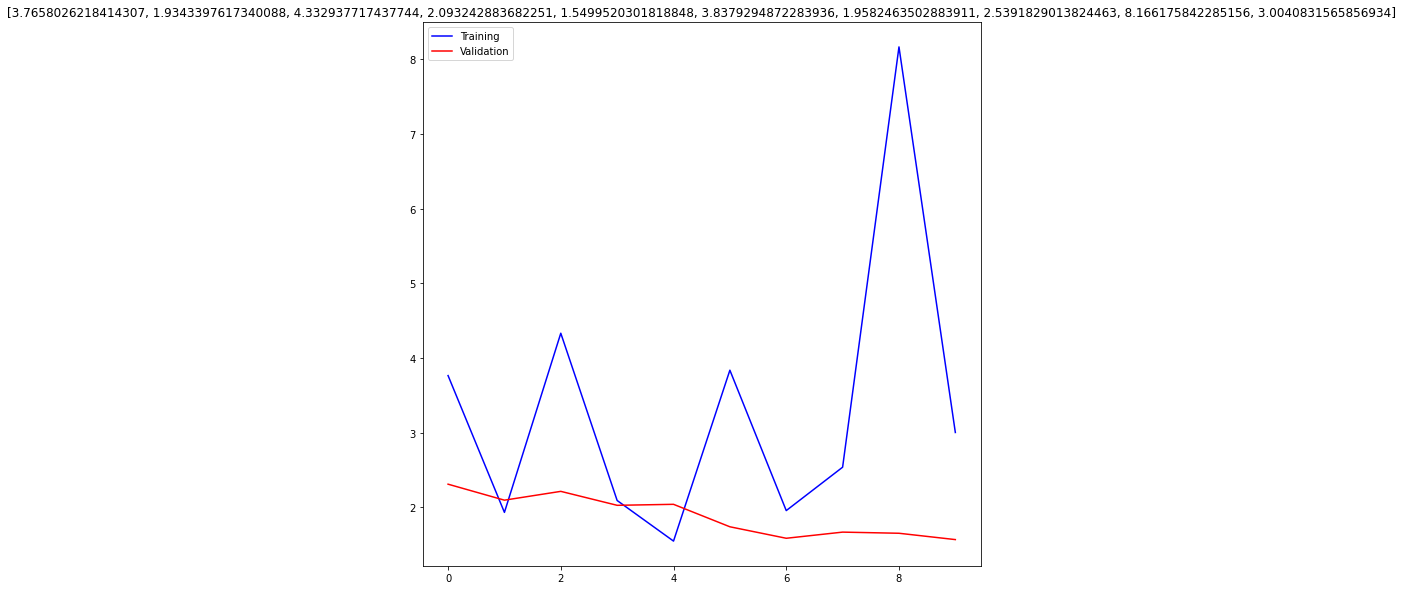

In [6]:
mrcnn.show_loss(h)

Loading weights from  /home/gmandi/Documents/DSIT/Deep-Learning/AIRBUS-Ship_Detection/models/serialized/mask-rcnn20200913T0145/mask_rcnn_mask-rcnn_0010.h5
Re-starting from epoch 10

*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 


*** No instances to display *** 



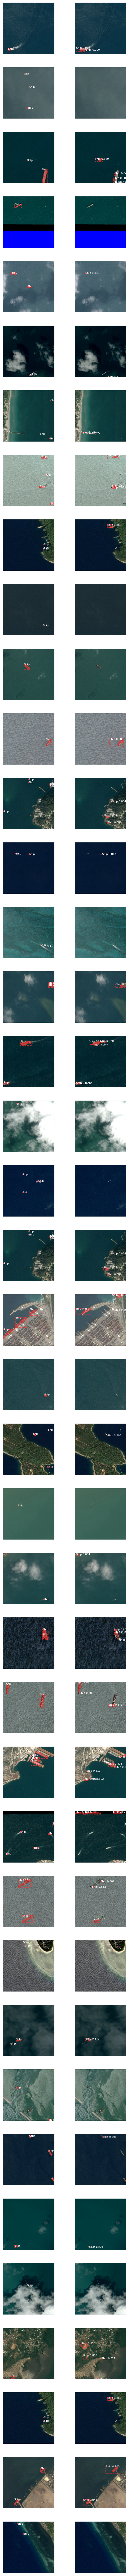

In [10]:
mrcnn = MRCNN('/home/gmandi/Documents/DSIT/Deep-Learning/AIRBUS-Ship_Detection/models/serialized/mask-rcnn20200913T0145/mask_rcnn_mask-rcnn_0010.h5', model_folder="../models/serialized/")
mrcnn.examine_inference(dd_valid, n=40)